# Things to make
- Wrong image checker
- Validate vit224 vs vit 384
- Evalutation metric

In [ ]:
pip install ipywidgets

In [89]:
import capston_util as cu
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from IPython.display import display, clear_output
from ipywidgets import interact, widgets

In [3]:
data, label, image_list, num_class=cu.init_data()

c:\Users\seung\OneDrive\바탕 화면\캡스톤\Federated_learning\Mixed-AutoEncoder\capston_util.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_table('./list/weather_test_list.txt', names=["path", "class"], delimiter='\s')


data :                                          path  class  name
0     ./dataset\fire_sample_1000\AoF04010.jpg      0  fire
1     ./dataset\fire_sample_1000\AoF04016.jpg      0  fire
2     ./dataset\fire_sample_1000\AoF04021.jpg      0  fire
3     ./dataset\fire_sample_1000\AoF04025.jpg      0  fire
4     ./dataset\fire_sample_1000\AoF04034.jpg      0  fire
...                                       ...    ...   ...
4062                  ./dataset\snow\1446.jpg      5  snow
4063                  ./dataset\snow\1447.jpg      5  snow
4064                  ./dataset\snow\1448.jpg      5  snow
4065                  ./dataset\snow\1449.jpg      5  snow
4066                  ./dataset\snow\1450.jpg      5  snow

[4067 rows x 3 columns]
number of image_list : 4067


## ViT224 vs ViT384
- As the result shows, It is resonable to use ViT224 + BisectingKmeans

In [5]:
import numpy as np

In [10]:
vit224_vector = np.loadtxt("output_vit_224.txt")
vit384_vector = np.loadtxt("output_vit_384.txt")
print(f'''vit224_vector.shape {vit224_vector.shape}
vit384_vector.shape {vit384_vector.shape}''')

vit224_vector.shape (4067, 768)
vit384_vector.shape (4067, 1000)


In [18]:
from sklearn.cluster import BisectingKMeans

BK_224 = BisectingKMeans(n_clusters = 6, max_iter = 300)
BK_224_y = BK_224.fit_predict(vit224_vector)

BK_384 = BisectingKMeans(n_clusters = 6, max_iter = 300)
BK_384_y = BK_384.fit_predict(vit384_vector)

Text(50.722222222222214, 0.5, 'class')

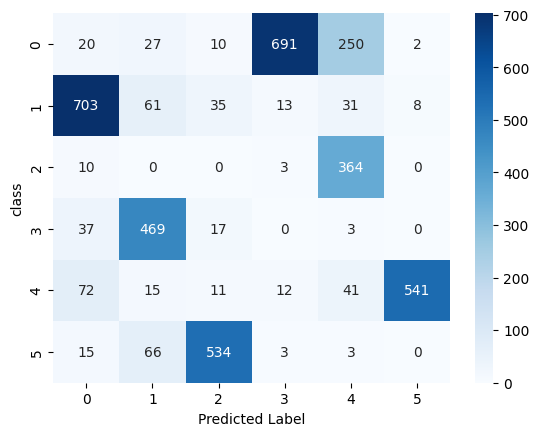

In [19]:
conf_224_matrix = confusion_matrix(label, BK_224_y)
sns.heatmap(conf_224_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('class')

Text(50.722222222222214, 0.5, 'class')

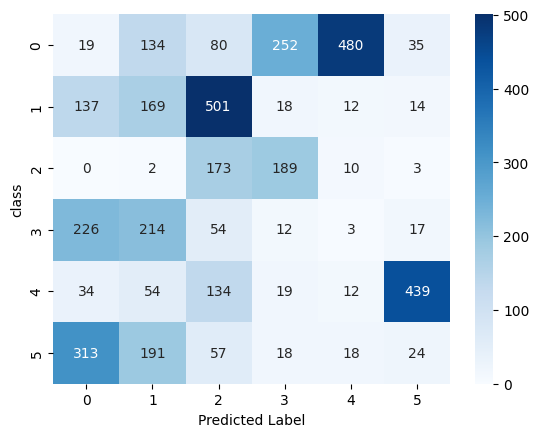

In [20]:
conf_384_matrix = confusion_matrix(label, BK_384_y)
sns.heatmap(conf_384_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('class')

## Clustering Evaluation

In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics

### Diagonalization of Answer matrix

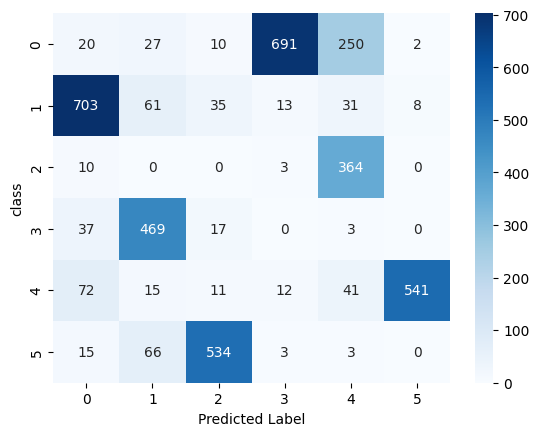

In [24]:
conf_224_matrix = confusion_matrix(label, BK_224_y)
sns.heatmap(conf_224_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('class')
cp = BK_224.cluster_centers_

In [29]:
new_order = [3,0,4,1,5,2]
cp_reordered = cp[new_order]
print(cp_reordered.shape)
KM = KMeans(n_clusters=6, init=cp_reordered, n_init=1)

(6, 768)


Text(50.722222222222214, 0.5, 'class')

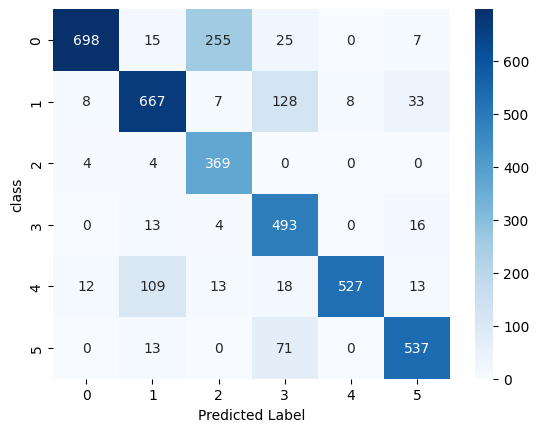

In [35]:
pred_diag = KM.fit_predict(vit224_vector)
diag_matrix = confusion_matrix(label, pred_diag)
sns.heatmap(diag_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('class')


### Evaluation1 : Ground Truth existing 

<div style="text-align:center;">
    <img src="./notebook_images/RandIndex.png" /><br>
    
a, the number of pairs of elements that are in the same set in C and in the same set in K<br>
b, the number of pairs of elements that are in different sets in C and in different sets in K
</div>

In [37]:
RI_score = metrics.rand_score(label,pred_diag)
print(f'RI score : {RI_score}')

RI score : 0.8876579226146987


<div style="text-align:center;">
    <img src="./notebook_images/AdjustedRandIndex.png" /><br>
    ARI >= 0.90 excellent recovery; 0.80 =< ARI < 0.90 good recovery; 0.65 =< ARI < 0.80 moderate recovery; ARI < 0.65 poor recovery.
</div>

In [38]:
ARI_score = metrics.adjusted_rand_score(label,pred_diag)
print(f"ARI score : {ARI_score}")

ARI score : 0.6121171458784941


<div style="text-align:center;">
    <img src="./notebook_images/MutualInformation.png" /><br>
    Entropy based metric
</div>

In [39]:
MI = metrics.mutual_info_score(label, pred_diag)
NMI = metrics.normalized_mutual_info_score(label, pred_diag)
print(f'''Mutual_info_score : {MI}
Normalized : {NMI}''')

Mutual_info_score : 1.1786993514757793
Normalized : 0.6682340171666038


<div style="text-align:center;">
    <img src="./notebook_images/FowlkesMallowsScores.png" /><br>
    Geometric mean of precision & recall
</div>

In [40]:
FMI = metrics.fowlkes_mallows_score(label,pred_diag)
print(f'Fowlkes-Mallows score : {FMI}')

Fowlkes-Mallows score : 0.6805558818530721


### Evaluation 2 : No Ground Truth

<div style="text-align:center;">
    <img src="./notebook_images/ShilloueteScore.png" /><br>
    a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster

Range : -1 to 1
</div>

In [42]:
SH = metrics.silhouette_score(vit224_vector,label)
print(f'Silhouette score : {SH}')

Silhouette score : 0.07944626635843811


<div style="text-align:center;">
    <img src="./notebook_images/Calinski-HarabaszIndex.png" /><br><br>
    <img src="./notebook_images/Calinski-HarabaszIndex_1.png">

 Ratio of the sum of between-clusters dispersion and of within-cluster dispersion
</div>

In [43]:
s = metrics.calinski_harabasz_score(vit224_vector,label)
print(f'Calinski-Harabasz Index : {s}')

Calinski-Harabasz Index : 188.8281206453408


# Check Wrong Images

In [ ]:
pred_diag

In [121]:
def check_wrong_image(data, pred_diag, num_class):
    ans_index = data['class'].value_counts()
    if len(ans_index) != num_class:
        raise ValueError("Number of unique classes in data does not match num_class")
    
    wrong_index = []
    s=0
    for i in range(num_class):
        for index in range(ans_index[i]):
            if pred_diag[s+index] != i:
                wrong_index.append(s+index)
        s = s + ans_index[i]

    return wrong_index

In [122]:
index_list = check_wrong_image(data,pred_diag,num_class)

In [136]:
pred_diag[1240]

1

Button(description='Next', style=ButtonStyle())

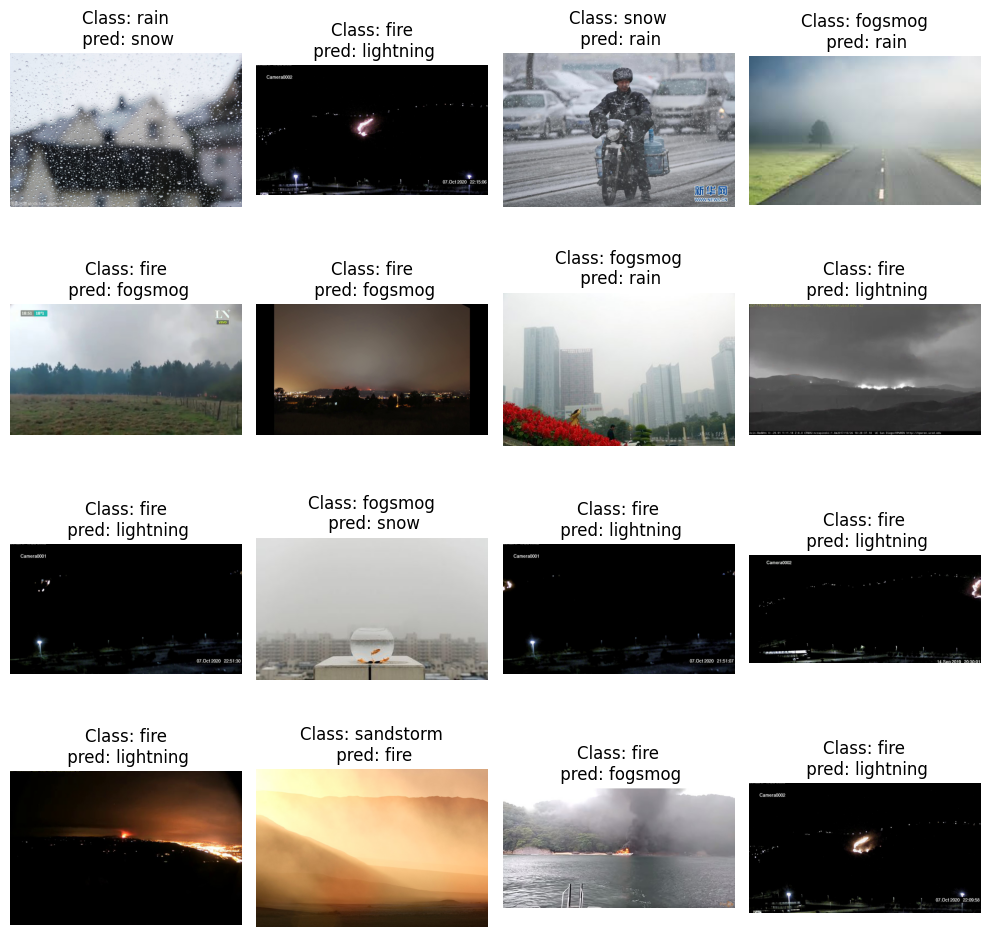

In [142]:
index_list = check_wrong_image(data, pred_diag, num_class)
random_indices = np.random.choice(index_list, size=100, replace=False)
image_data = image_list

def show_images(indices, data, pred):
    names = ['fire','fogsmog', 'lightning', 'rain', 'sandstorm','snow']
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        idx = indices[i]
        image_idx = random_indices[idx]  
        ax.imshow(image_data[image_idx], cmap='gray')  
        ax.axis('off')
        pred_name = names[pred[image_idx]]
        class_name = data['name'].iloc[image_idx] 
        ax.set_title(f'Class: {class_name}\n pred: {pred_name}')
    plt.tight_layout()
    plt.show()

def show_next_images(button):
    global current_index
    if current_index + 16 < len(index_list):
        current_index += 16
        clear_output(wait=True)
        display(next_button)
        show_images(index_list[current_index:current_index+16], data, pred)

next_button = widgets.Button(description="Next")
next_button.on_click(lambda button: show_next_images(button, data, pred_diag))
display(next_button)

current_index = 0
show_images(list(range(current_index, current_index+16)),data, pred_diag) 


In [ ]:
wrong_index